<a href="https://colab.research.google.com/github/dmorton714/plot_demo/blob/main/plot_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

https://matplotlib.org/stable/gallery/index.html

In [3]:
def get_data(size = 15):
  df = pd.DataFrame()
  df['Student'] = np.random.choice(['Berry', 'Tom', 'Larry', 'Sam', 'Sonny', 'Mary'], size)
  df['test_score'] = np.random.randint(0, 100, size)
  df['class_grade'] = np.random.randint(0, 100, size)
  return df

In [4]:
get_data().to_csv('get_data.csv', index=False)
df = pd.read_csv('get_data.csv')
df

,Student,test_score,class_grade
0,Mary,25,68
1,Tom,23,52
2,Larry,1,68
3,Sam,70,75
4,Sonny,0,30
5,Mary,40,38
6,Larry,89,56
7,Larry,93,64
8,Sonny,62,7
9,Mary,58,47


In [ ]:
df.plot()

In [ ]:
df['class_grade'].plot.pie()

In [ ]:
df.plot.box()

<AxesSubplot:>

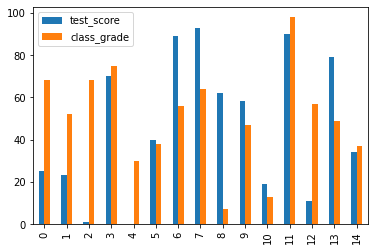

In [5]:
df.plot.bar()

<h2>Basic modifications to the plot</h2>
<br> 
title = '' 
<br> 
This is for the title of the graph. 
<br>
<br>
x = '' & y = ''
<br>
This tells the graph what to put on the respective axis. 
<br>
<br>
xlabel = '' & ylabel = '' 
<br>
This adds the axis labels. 
<br><br>
rot = ''
<br>
Changes the rotation on the axis labels. 

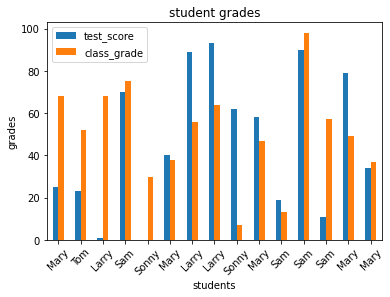

In [11]:
df.plot.bar(title = "student grades", x = "Student", xlabel= 'students', ylabel='grades', rot='45'); 

<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 

<AxesSubplot:title={'center':'Test Grades vs Class Grades'}, xlabel='students', ylabel='Grade'>

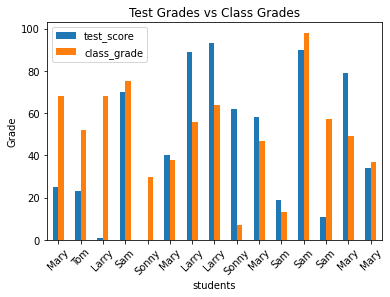

In [12]:
df.plot.bar(title = 'Test Grades vs Class Grades', xlabel = "students", rot = 45, ylabel = "Grade", x = "Student")

Calls the random data frame function made from the start of the project

In [13]:
get_data()

,Student,test_score,class_grade
0,Berry,53,68
1,Sam,94,76
2,Berry,51,98
3,Tom,61,85
4,Larry,61,10
5,Sonny,9,23
6,Larry,26,36
7,Mary,58,20
8,Berry,87,5
9,Tom,43,32


Example showing that you can plot of a function. 

<AxesSubplot:xlabel='Student'>

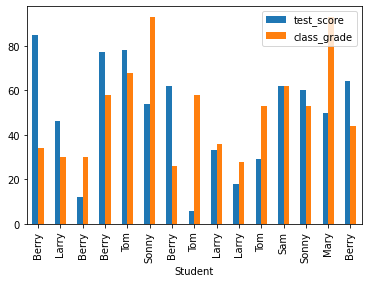

In [14]:
get_data().plot.bar(x= 'Student')

Another example showing a plot off a function. This time calling from the dataframe and doing a value count on the students col

<AxesSubplot:>

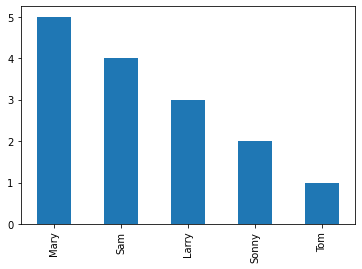

In [15]:
df['Student'].value_counts().plot.bar()

Like we learned above you can apply all the same parameters when plotting a function. 

<AxesSubplot:title={'center':'Test Grades vs Class Grades'}, xlabel='students', ylabel='Grade'>

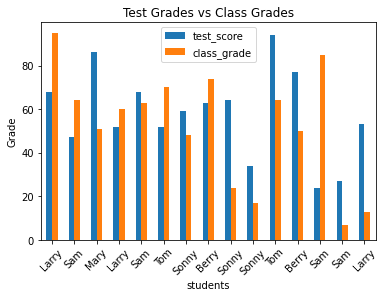

In [16]:
get_data().plot.bar(title = 'Test Grades vs Class Grades', xlabel = "students", rot = 45, ylabel = "Grade", x = "Student")

Here we grouped the students with the same name together and did a mean calculation off the vaues in the test scores and class grades. 

<AxesSubplot:xlabel='Student'>

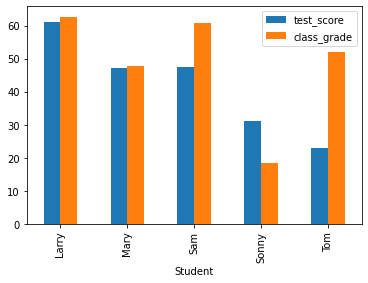

In [17]:
df.groupby(by=['Student']).mean().plot.bar()


Below is my prefered way to graph as its easy to follow and make changes without being cluttered. 

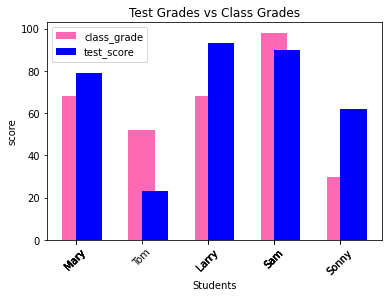

In [18]:
# Defines whats is to be graphed
x = df['Student']
y = df['class_grade']
y2 = df['test_score']

# Defines what to graph, color ect
plt.bar(x, y, width = .4, color = "hotpink", align='center', label = 'class_grade')
plt.bar(x, y2, width = .4, color = "blue", align='edge', label = 'test_score')
# Defines x ticks and rotation  
plt.xticks(df['Student'], rotation = 45)
# labels the Y axis
plt.ylabel('score')
# labels the x axis 
plt.xlabel('Students')
# Title of the graph 
plt.title('Test Grades vs Class Grades')
# defines the legends location
plt.legend(loc="best")

# must save the plot before showing the plot
# plt.savefig('grade.jpg', dpi=100, bbox_inches = 'tight')

# shows the graph 
plt.show()

<h1>Plotly Examples below </h2>

In [19]:
fig = px.bar(df, x="Student", y="class_grade", color="test_score", text_auto=True)
fig.show()

In [20]:
import plotly.io as pio


aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'bar',
  x = df['Student'],
  y = df['class_grade'],
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = df['Student'],
    aggregations = [dict(
        target = 'y', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Plotly Aggregations</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Student'),
  yaxis = dict(title = 'Score', range = [0,5]),
  updatemenus = [dict(
        x = 1.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)